# Skeleton code for CIFAR datasets
- use the code for the implementation of CIFAR dataloaders

In [2]:
!nvidia-smi
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
print(torch.__version__)

Thu Apr 30 05:26:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 23%   29C    P8     7W / 250W |     10MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   25C    P8     8W / 250W |     10MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

# Model

- write your LeNet and AlexNet code in the following ```LeNet,AlexNet``` class

In [3]:
class LeNet(nn.Module):
    
    def __init__(self,in_channel,out_channel):
        super(LeNet,self).__init__()

        self.convs = nn.ModuleList([nn.Conv2d(in_channel,6,5,padding=2),nn.Conv2d(6,16,5)])
        
        self.linears = nn.ModuleList([nn.Linear(16*6*6,120),nn.Linear(120,84)])
        self.final_linear = nn.Linear(84,out_channel)
    def forward(self,x):
        # convolution layers 
        for conv in self.convs:
            x = conv(x)
            x = F.sigmoid(x)
            x = F.avg_pool2d(x,2,2)
        #Flatten
        x = x.view(x.size(0),-1)
        # Linears layers
        for linear in self.linears:
            x = linear(x)
            x = F.sigmoid(x)
        x = self.final_linear(x)
        return x

class AlexNet(nn.Module):

    def __init__(self,in_channel,out_channel):
        super(AlexNet,self).__init__()
        
        self.convs = nn.ModuleList([nn.Conv2d(in_channel,64,3,2,padding=1),nn.Conv2d(64,192,3,padding=1),
                                    nn.Conv2d(192,384,3,padding=1),nn.Conv2d(384,256,3,padding=1),
                                    nn.Conv2d(256,256,3,padding=1)])
        self.linears = nn.ModuleList([nn.Linear(256*2*2,4096),nn.Linear(4096,4096)])
        self.final_linear = nn.Linear(4096,out_channel)
        
    def forward(self,x):
        #convolution layers
        for i, conv in enumerate(self.convs):
            if i < 2:
                x = conv(x)
                x = F.relu(x)
                x = F.max_pool2d(x,2)
            else:
                x = conv(x)
                x = F.relu(x)
        x = F.max_pool2d(x,2)
        #Flatten
        x = x.view(x.size(0),-1)
        # Linears layers
        for linear in self.linears:
            x = F.dropout(x)
            x = linear(x)
            x = F.relu(x)

        x = self.final_linear(x)
        return x
    
# device = torch.device('cuda:3'if torch.cuda.is_available() else "else")
# you can change model(example : Alexnet, LeNet)
model = AlexNet(3,10).cuda()

#Loss function & optimizers
"""
you can change the loss and optimizer
"""
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


# Hyperparameters
"""
you can change the value
"""
num_epochs = 300
batch_size = 128

# Training & Evalutaion 
- Don't change the below codes

Files already downloaded and verified
Files already downloaded and verified

train accuracy: 31.09 %, test accuracy: 43.68 %
epoch:1, train_loss: 1.7822, test_loss: 1.5175

train accuracy: 68.93 %, test accuracy: 69.29 %
epoch:11, train_loss: 0.9046, test_loss: 0.9064

train accuracy: 74.98 %, test accuracy: 74.11 %
epoch:21, train_loss: 0.7434, test_loss: 0.7830

train accuracy: 77.48 %, test accuracy: 76.61 %
epoch:31, train_loss: 0.6630, test_loss: 0.7200

train accuracy: 79.29 %, test accuracy: 77.38 %
epoch:41, train_loss: 0.6129, test_loss: 0.6947

train accuracy: 80.13 %, test accuracy: 77.81 %
epoch:51, train_loss: 0.5802, test_loss: 0.6842

train accuracy: 81.21 %, test accuracy: 78.30 %
epoch:61, train_loss: 0.5580, test_loss: 0.6785

train accuracy: 81.98 %, test accuracy: 79.54 %
epoch:71, train_loss: 0.5383, test_loss: 0.6354

train accuracy: 82.58 %, test accuracy: 79.49 %
epoch:81, train_loss: 0.5171, test_loss: 0.6490

train accuracy: 83.04 %, test accuracy: 79.55 %
epo

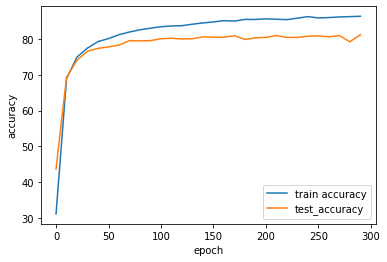

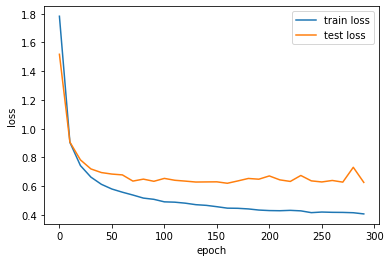

In [4]:
import sys
sys.path.insert(0, "..")
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# CIFAR preprocessing 
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# DataLoader for CIFAR-10
cifar_train = torchvision.datasets.CIFAR10(root="./", 
                                         train=True, 
                                         download=True,
                                         transform=transform_train
                                         )
cifar_test = torchvision.datasets.CIFAR10(root="./", 
                                        train=False, 
                                        download=True,
                                        transform=transform_test)


train_loader = DataLoader(cifar_train, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=4)

 
accuracy_graph = {'train':[], 'test':[], 'epoch': []}
loss_graph = {'train':[], 'test':[], 'epoch': []}

class accumulator():
    def __init__(self):
        self.cnt = 0
        self.obs = 0
        self.loss = 0

    def add(self, predict, output):

        assert len(predict) == len(output)

        self.cnt += self.count(predict, output).cpu().numpy()
        self.obs += len(predict)
    
    def count(self, predict, output):
        correct = torch.sum(torch.argmax(predict, dim=1) == output)
        
        return correct
        
    def loss_update(self, loss, batch_size):
        self.loss += loss * batch_size

    def running_stat(self):
        if self.obs != 0:
            run_acc = 100 * self.cnt / self.obs
            run_loss = self.loss / self.obs
        else: 
            run_acc = 0
            rum_loss = 0

        return run_acc, run_loss

    def reset(self):
        self.__init__()


for epoch in range(num_epochs):

    train_accuracy = accumulator()
    test_accuracy = accumulator()

    # Training
    for train_x, train_y in train_loader: 

        train_x, train_y = train_x.cuda(), train_y.cuda()
        train_predict = model(train_x)
        loss = criterion(train_predict, train_y)

        # Backpropagation        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_accuracy.add(train_predict, train_y)
        train_accuracy.loss_update(loss, batch_size)

    # Evaluation
    if epoch % 10 ==0:
             
        for test_x, test_y in test_loader:

            with torch.autograd.no_grad():
                test_x, test_y = test_x.cuda(), test_y.cuda()
                test_predict = model(test_x)
                test_accuracy.add(test_predict, test_y)

            loss_test = criterion(test_predict, test_y)
            test_accuracy.loss_update(loss_test, batch_size)

        train_acc, train_loss = train_accuracy.running_stat()
        test_acc, test_loss = test_accuracy.running_stat()
        accuracy_graph['train'].append(train_acc)
        accuracy_graph['test'].append(test_acc) 
        accuracy_graph['epoch'].append(epoch)
        loss_graph['train'].append(train_loss)
        loss_graph['test'].append(test_loss)
        loss_graph['epoch'].append(epoch)
        
        print("\ntrain accuracy: {:.2f} %, test accuracy: {:.2f} %".format(train_acc, test_acc))
        print("epoch:{}, train_loss: {:.4f}, test_loss: {:.4f}".format(epoch+1, train_loss, test_loss)) 

        train_accuracy.reset(), test_accuracy.reset()


plt.plot(accuracy_graph['epoch'], accuracy_graph['train'], label = "train accuracy");
plt.plot(accuracy_graph['epoch'], accuracy_graph['test'], label = "test_accuracy");
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

plot_loss_train = plt.plot(loss_graph['epoch'], loss_graph['train'], label="train loss");
plt.plot(loss_graph['epoch'], loss_graph['test'], label="test loss");
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()